In [231]:
from sklearn.manifold import MDS, TSNE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
df = pd.read_csv("./df_ordered_top50.csv", sep=';')

In [113]:
dfbb = df.value_counts(['hero1_nick', 'hero2_nick']).rename('counts')

In [114]:
dfbb['HUMAN TORCH','THING']

744

In [115]:
dfbb

hero1_nick            hero2_nick          
HUMAN TORCH           THING                   744
                      MR. FANTASTIC           713
MR. FANTASTIC         THING                   708
INVISIBLE WOMAN       MR. FANTASTIC           701
HUMAN TORCH           INVISIBLE WOMAN         694
                                             ... 
FURY, COL. NICHOLAS   HAVOK                     1
CRYSTAL [INHUMAN]     WATSON-PARKER, MARY       1
BLACK PANTHER         HAVOK                     1
SHADOWCAT             SILVER SURFER             1
ROGUE                 WATSON-PARKER, MARY       1
Name: counts, Length: 1261, dtype: int64

In [246]:
nicks = sorted(dfbb.reset_index().hero1_nick.unique())

In [247]:
nicks2 = sorted(dfbb.reset_index().hero2_nick.unique())

In [248]:
dsm = np.array([[dfbb[m,n] if (m,n) in dfbb else 0 for m in nicks] for n in nicks])

In [249]:
dsm = dsm + dsm.T - 2*np.diag(np.diag(dsm))

In [250]:
dsm = dsm / dsm.max()

In [251]:
dsm

array([[0.        , 0.03360215, 0.41532258, ..., 0.04166667, 0.00134409,
        0.16532258],
       [0.03360215, 0.        , 0.12768817, ..., 0.54569892, 0.00403226,
        0.02419355],
       [0.41532258, 0.12768817, 0.        , ..., 0.15994624, 0.00537634,
        0.19623656],
       ...,
       [0.04166667, 0.54569892, 0.15994624, ..., 0.        , 0.00537634,
        0.04569892],
       [0.00134409, 0.00403226, 0.00537634, ..., 0.00537634, 0.        ,
        0.0094086 ],
       [0.16532258, 0.02419355, 0.19623656, ..., 0.04569892, 0.0094086 ,
        0.        ]])

In [449]:
ds = np.exp(-np.sqrt(dsm)) - np.eye(50)

In [450]:
dsm[20,44]

1.0

In [451]:
ds[20,44]

0.36787944117144233

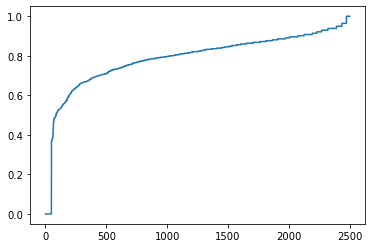

In [452]:
plt.plot(sorted(ds.reshape(50*50)))

In [453]:
for n in enumerate(nicks):
    for m in nicks:
        pass

In [469]:
mds = MDS(10, dissimilarity='precomputed')

In [470]:
r = np.random.rand(50,50)

In [471]:
mds.fit(dsm)

MDS(dissimilarity='precomputed', n_components=10)

In [472]:
ds[20,44]

0.36787944117144233

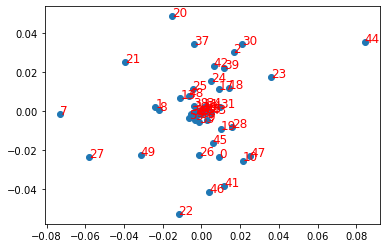

In [473]:
plt.scatter(mds.embedding_[:,0], mds.embedding_[:,1])
for i, (x, y) in enumerate(zip(mds.embedding_[:,0], mds.embedding_[:,1])):
    plt.text(x, y, str(i), color="red", fontsize=12)

In [474]:
X = mds.embedding_

In [508]:
tsne = TSNE(2, perplexity=8.5, n_iter=10000)

In [509]:
tsne.fit(X)

TSNE(n_iter=10000, perplexity=8.5)

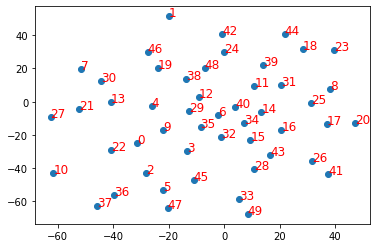

In [510]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1])
for i, (x, y) in enumerate(zip(tsne.embedding_[:,0], tsne.embedding_[:,1])):
    plt.text(x, y, str(i), color="red", fontsize=12)

In [501]:
nicks[37]

'SCARLET WITCH'

In [479]:
dfbb[nicks[20], nicks[44]]

744

FileNotFoundError: [Errno 2] No such file or directory: 'a.jpg'

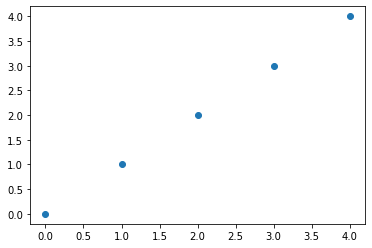

In [321]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path))

paths = [
    'a.jpg',
    'b.jpg',
    'c.jpg',
    'd.jpg',
    'e.jpg']

x = [0,1,2,3,4]
y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)